## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import os.path
from pathlib import Path 
import time
import datetime

from notebook_funcs.cleaner import *
from notebook_funcs.helper import *
from notebook_funcs.live import *
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
## Import live logged playback info
#his = read_logs()
#his

In [3]:
# create listening history dataframe from desired directory within input folder
print(os.getcwd())
directory = Path('input/20220904') # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)

his.tail(5)

/home/patrick/Documents/projects/SpotiPy-Wrapped
Files Included: 6 

Unique Values:
endTime       45661
artistName     2297
trackName      6040
msPlayed      14050
dtype: int64


,endTime,artistName,trackName,msPlayed
9995,2021-11-09 04:39,The Strokes,Last Nite,193373
9996,2021-11-09 04:43,Young the Giant,Superposition,230959
9997,2021-11-09 04:47,The Strokes,Under Cover of Darkness,235546
9998,2021-11-09 04:52,Journey,Message of Love,334173
9999,2021-11-09 04:57,Young the Giant,Cough Syrup,249520


In [ ]:
skipped = sort_skipped(his)
unskipped = sort_unskipped(his)

tracks = get_tracks(unskipped)
artists = get_artists(unskipped)

### Graphs

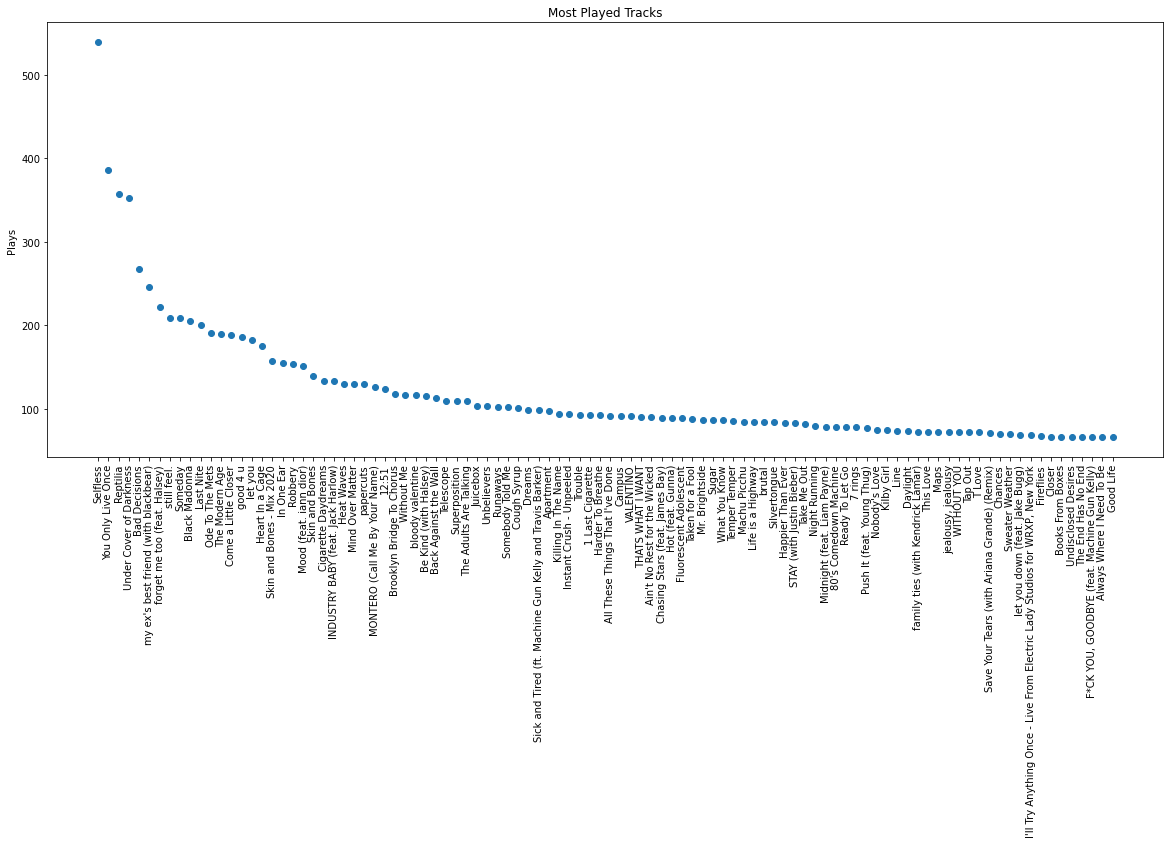

In [5]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

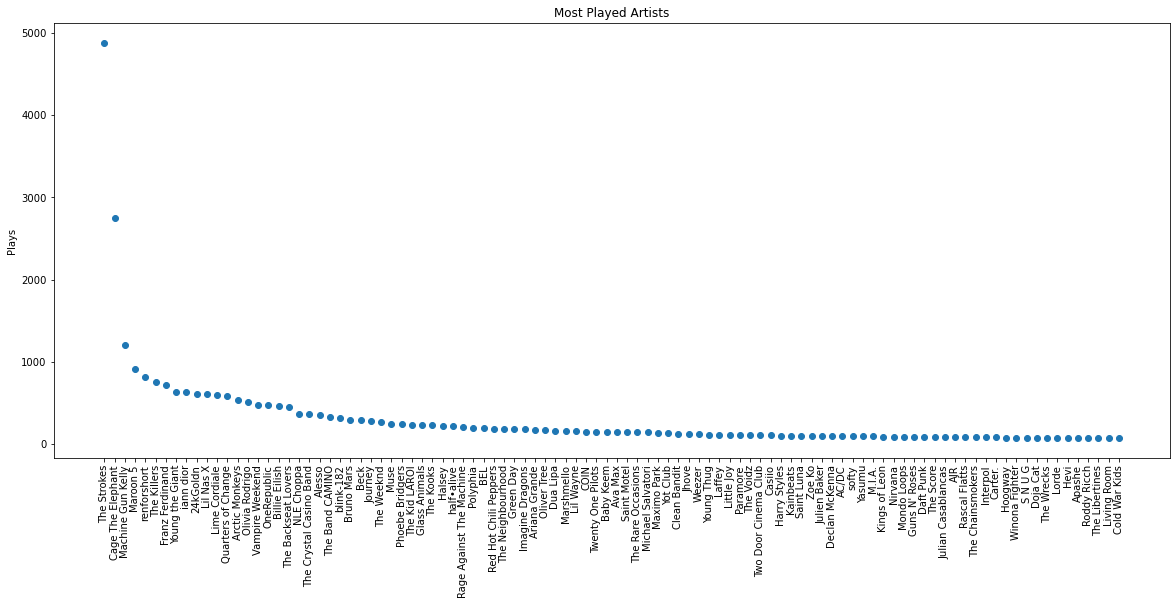

In [6]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

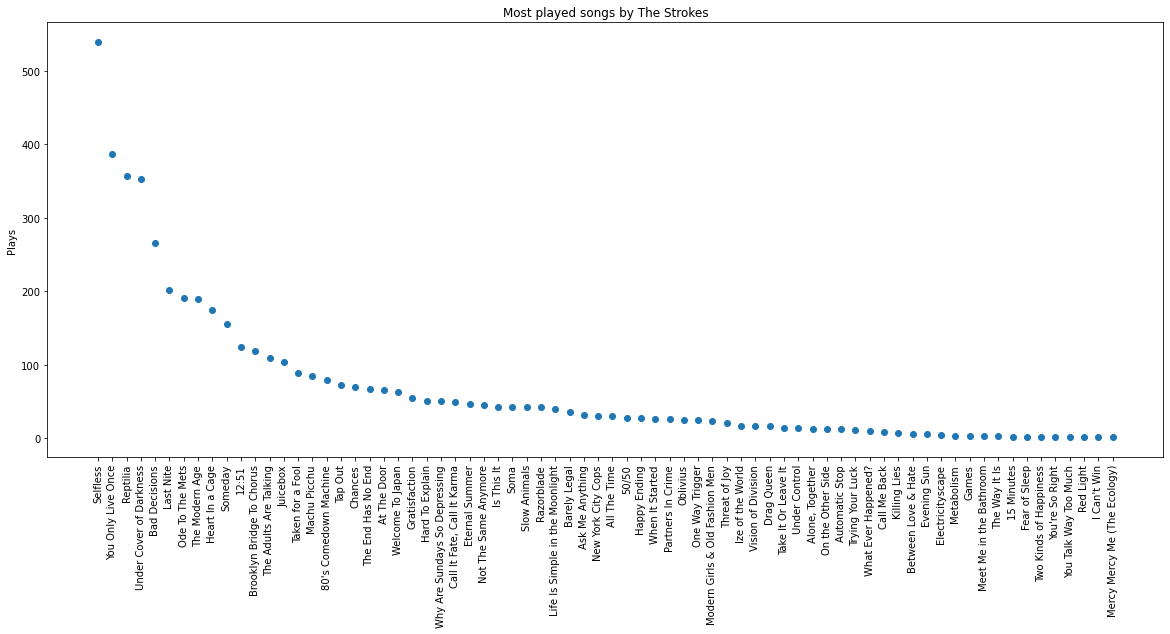

In [21]:
plotArtist("The Strokes", 100)

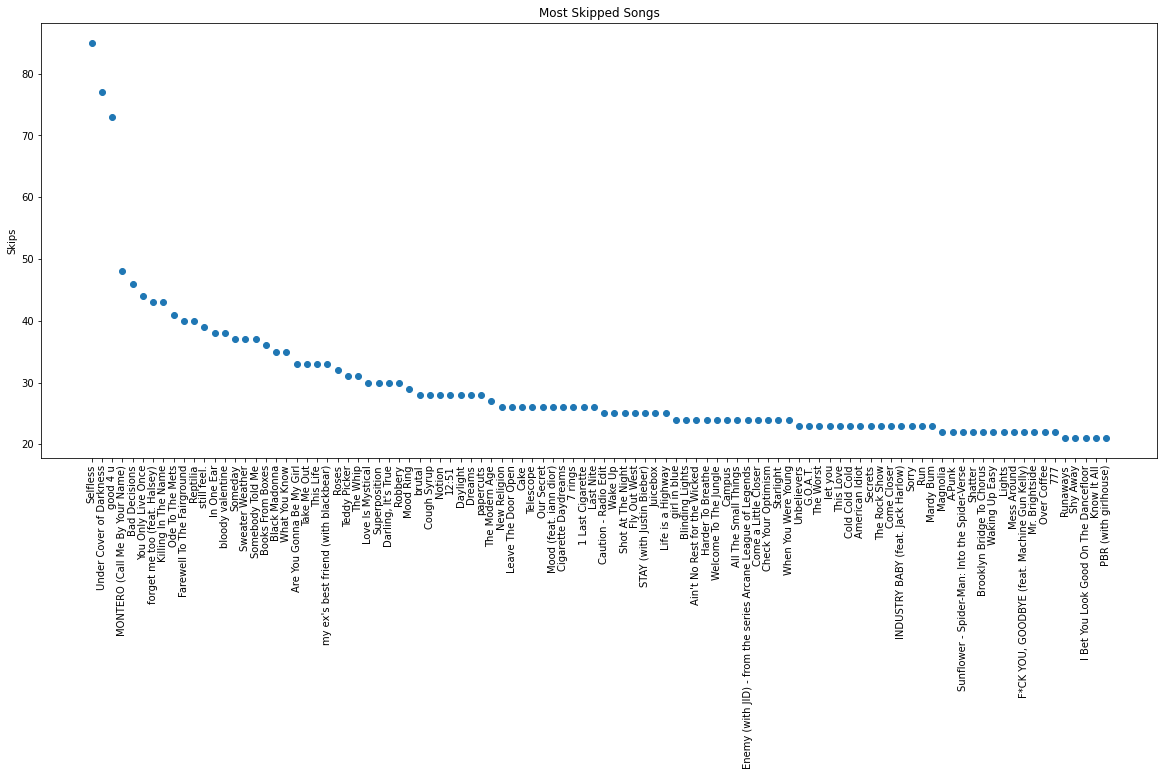

In [8]:
skipped_tracks = skipped['trackName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

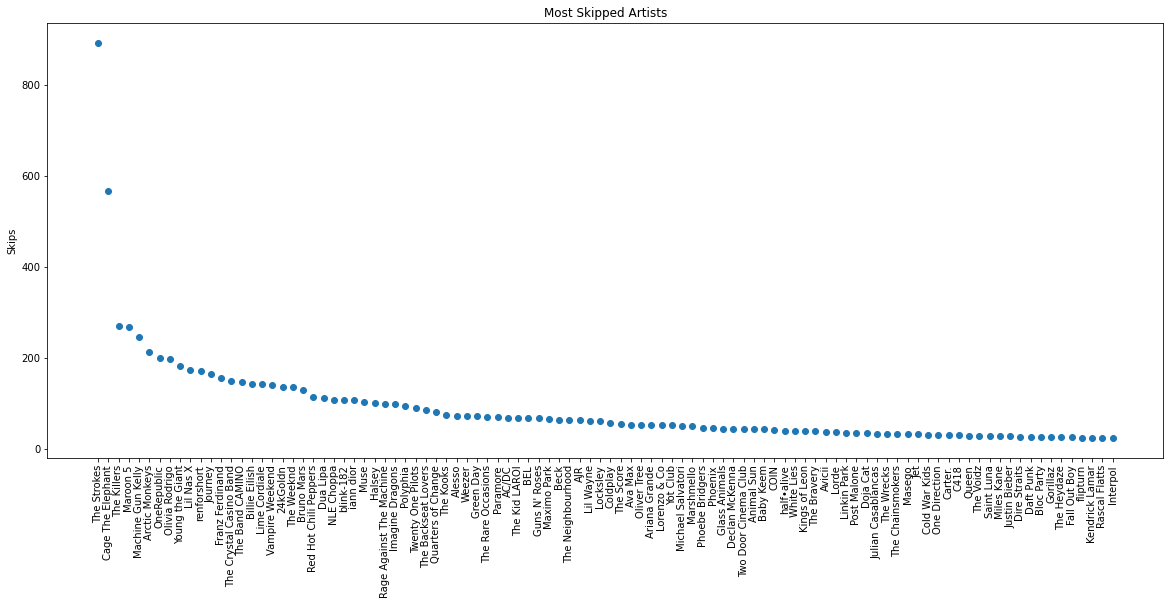

In [9]:
skipped_artists = skipped['artistName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

### Other Information

In [10]:
# change n to find your n top songs
n = 10
print(topSongPlays(n))

Your top 10 songs: 
Song                       Plays
Selfless                                539
You Only Live Once                      386
Reptilia                                357
Under Cover of Darkness                 352
Bad Decisions                           267
my ex's best friend (with blackbear)    246
forget me too (feat. Halsey)            222
still feel.                             209
Someday                                 209
Black Madonna                           205
Name: trackName, dtype: int64


In [11]:
# Get playtime
t = playtime(unskipped)

Total minutes listened: 150222
Total hours listened: 2503.7


### Artist/Song specific information

In [12]:
artist = 'The Backseat Lovers' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)

You have listened to The Backseat Lovers endTime       451
artistName      1
trackName      17
msPlayed       71
dtype: int64 times.


In [13]:
track = "Sunburnt" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)

You have listened to Sunburnt endTime       54
artistName     1
trackName      1
msPlayed       6
dtype: int64 times.


### Timeframe specific information

In [14]:
# Plot top artists since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topArtistsTimeframe(timeframe)

The Strokes            2470
Cage The Elephant      1766
renforshort             812
iann dior               635
Franz Ferdinand         633
24kGoldn                613
Quarters of Change      581
Machine Gun Kelly       548
Vampire Weekend         457
The Backseat Lovers     448
Name: artistName, dtype: int64

In [15]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topSongsTimeframe(timeframe)

Selfless                   323
let you                    182
Reptilia                   181
You Only Live Once         167
Under Cover of Darkness    164
Mood (feat. iann dior)     151
Bad Decisions              136
Come a Little Closer       116
Back Against the Wall      112
Last Nite                  101
Name: trackName, dtype: int64

In [16]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-30' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper)

The Strokes            2470
Cage The Elephant      1766
renforshort             812
iann dior               635
Franz Ferdinand         633
24kGoldn                613
Quarters of Change      581
Machine Gun Kelly       548
Vampire Weekend         457
The Backseat Lovers     448
Name: artistName, dtype: int64

In [17]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-31' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)

Selfless                                                    323
let you                                                     182
Reptilia                                                    181
You Only Live Once                                          167
Under Cover of Darkness                                     164
Mood (feat. iann dior)                                      151
Bad Decisions                                               136
Come a Little Closer                                        116
Back Against the Wall                                       112
Last Nite                                                   101
Sick and Tired (ft. Machine Gun Kelly and Travis Barker)     99
Cigarette Daydreams                                          98
Ode To The Mets                                              95
my ex's best friend (with blackbear)                         94
VALENTINO                                                    92
Unbelievers                             

In [18]:
# Get listening time for a given month
# inputs - month number and year
month = 8 
year = 2022 
listeningTimeMonth(month, year)

197.53819333333334

In [19]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'renforshort'
listeningTimeArtist(artist)

40.62520138888889